- Statistics: a practice and study of collecting and analyzing data
- Summary stats: a fact or summary about data

### What can statistics do?

With statistics, you can answer business questions from data:
- Like how likely is a person to purchase a product?
- If you used a certain advert will people purchase it more?
- How many T-shirts will you produce to fit 95% percent of the population/ your target market?

### What can't statistics do?

### Types of statistics

 - Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.

    1. Given the data of 50 patients in a hospital, what is the average weight of all the patients in the hospital?
    2. Given the data on every customer request made, what is the average time it took to respond?
    3.  Given the data on all 100,000 people who took a course, what percent of people reated it 5-star?
    4. After veiwing 100 customers, what percentage of all your customers are satisfied with your product?

### Types of data

In [ ]:
# Numeric Data
# Categorical Data

- What type of data is this?
    - Air temperature - numeric (continous)
    - Killowatts of Electricity used
    - Nummber of items in a stock
    - Number of Assesments taken
    - Number of clicks on an ad
    - Brand of a product
    - zip code

In [1]:
filepath = "/content/ds_salaries.csv"
import pandas as pd
df = pd.read_csv(filepath)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [3]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
data_type = {'work_year':'categorical',
             'experience_level':'categorical_ord',
             'employment_type': 'categorical_nom',
             'job_title': 'categorical_nom',
             'salary': 'numeric_con',
             'salary_currency': 'categorical_nom',
             'salary_in_usd':'numeric_con',
             'employee_residence': 'categorical_nom',
             'remote_ratio': 'categorical_ord',
             'company_location': '?',
             'company_size':'?'}

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

### Descriptive Statistics

 - Measures of central tendency
-  Measures of spread

In [7]:
# mean
# sum of data points / number of data points
# heavily influenced by outliers

In [8]:
# median
# middle of the distribution
# robust to outliers

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

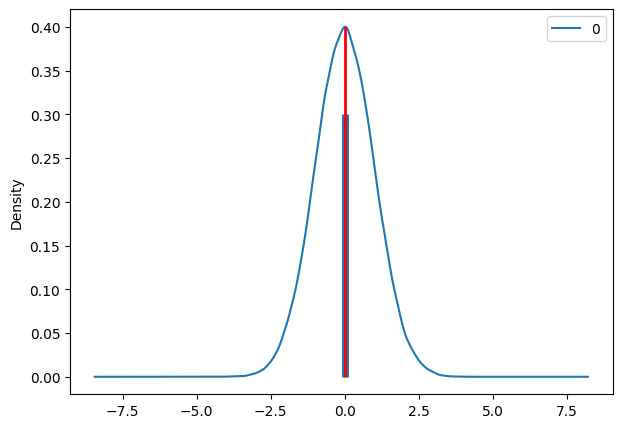

In [10]:
norm_data = pd.DataFrame(np.random.normal(size = 100000))

norm_data.plot(kind='density',
              figsize = (7, 5));

plt.vlines(norm_data.mean(),
          ymin=0,
          ymax=0.3,
          linewidth = 5.0);

plt.vlines(norm_data.median(),
          ymin=0,
          ymax=0.4,
          linewidth = 2.0,
          color = 'red');


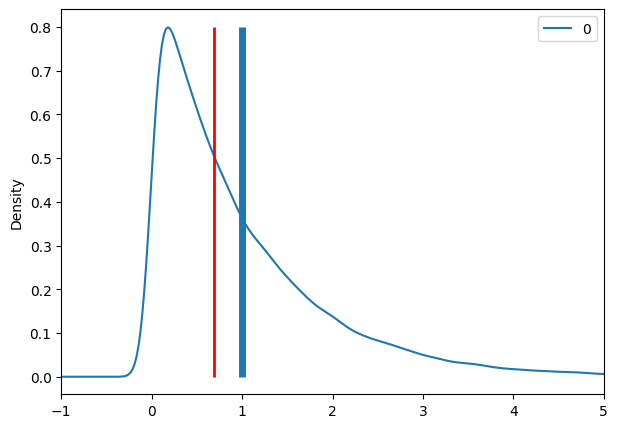

In [11]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(7,5),
              xlim=(-1,5));


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0,
           ymax=0.8,
           linewidth=5.0);

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0,
           ymax=0.8,
           linewidth=2.0,
           color="red");

In [12]:
# mode
# most frequent value

df.job_title.mode()

0    Data Scientist
Name: job_title, dtype: object

In [13]:
df.mode()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022.0,SE,FT,Data Scientist,80000,USD,100000.0,US,100.0,US,M
1,NaN,NaN,NaN,NaN,100000,NaN,NaN,NaN,NaN,NaN,NaN


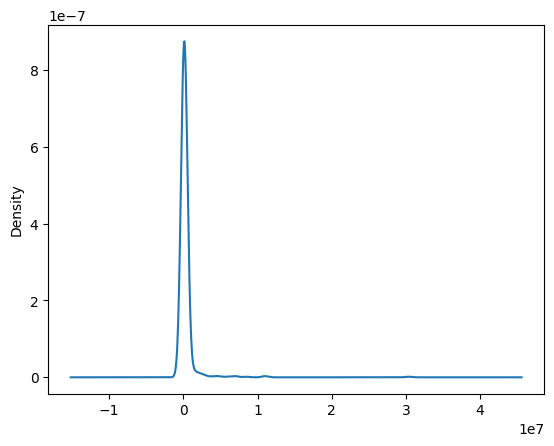

In [14]:
df.salary.plot(kind = 'density')
plt.show()

In [15]:
df.salary.value_counts()

100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64

In [16]:
# how do salaries vary by country?

salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)

In [17]:
salary_by_country[:10]

employee_residence
MY    200000.000000
PR    160000.000000
US    149194.117470
NZ    125000.000000
CH    122346.000000
AU    108042.666667
RU    105750.000000
SG    104176.500000
JP    103537.714286
AE    100000.000000
Name: salary_in_usd, dtype: float64

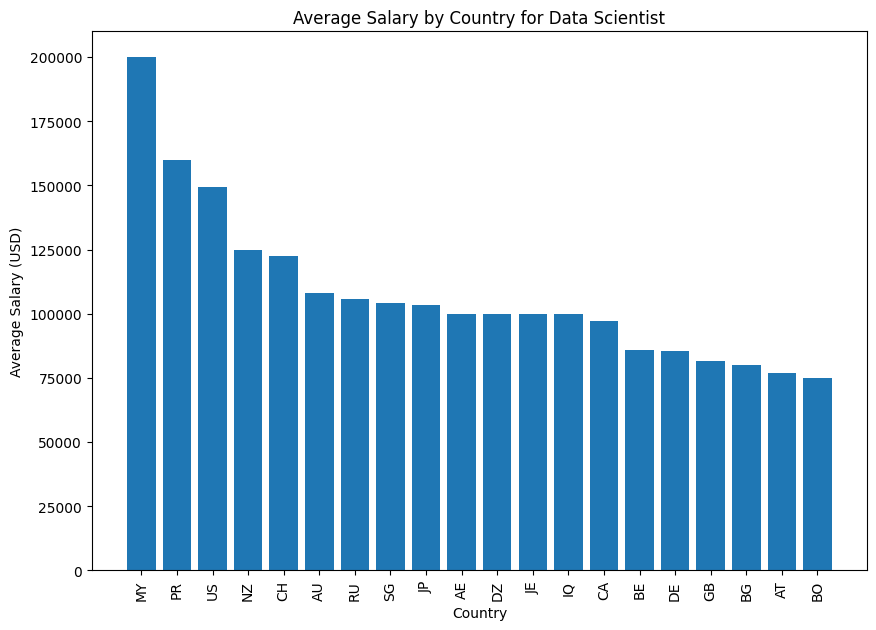

In [18]:
plt.figure(figsize=(10, 7))
plt.bar(salary_by_country[:20].index, salary_by_country[:20].values)

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country for Data Scientist')
plt.show()

In [19]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [20]:
# what is the average salary for a data scientist?
# sum of salary / number of items = mean or average
data_scientist = df[df['job_title'] == 'Data Scientist']
round(data_scientist['salary_in_usd'].mean(), 2)

# how do salaries vary by expereince level?

108187.83

In [21]:
def avg_salary_by_role(role):
    role_df = df[df['job_title'] == role]
    return round(role_df['salary_in_usd'].mean(), 2)

In [22]:
avg_salary_by_role('Data Engineer')

112725.0

In [23]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [24]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
# how do salaries vary by expereince level?

df.groupby('experience_level')['salary_in_usd'].mean()

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64

In [27]:
df.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().sort_values(ascending =False)

experience_level  job_title                    
EX                Principal Data Engineer          600000.00
MI                Financial Data Analyst           450000.00
EX                Principal Data Scientist         416000.00
SE                Data Analytics Lead              405000.00
                  Applied Data Scientist           278500.00
                                                     ...    
EN                AI Scientist                      21987.25
                  Data Analytics Engineer           20000.00
                  ML Engineer                       18974.50
MI                Product Data Analyst              13036.00
                  3D Computer Vision Researcher      5409.00
Name: salary_in_usd, Length: 105, dtype: float64

In [28]:
df.pivot_table(values='salary_in_usd', index='experience_level', aggfunc='mean')

,salary_in_usd
experience_level,
EN,61643.318182
EX,199392.038462
MI,87996.056338
SE,138617.292857


In [29]:
# which job titles pay the highest
df.pivot_table(values='salary_in_usd', index='job_title', aggfunc='mean').sort_values(by='salary_in_usd', ascending=False)

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000
Data Architect,177873.909091
Applied Data Scientist,175655.000000
Analytics Engineer,175000.000000
Data Specialist,165000.000000


In [30]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending =False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

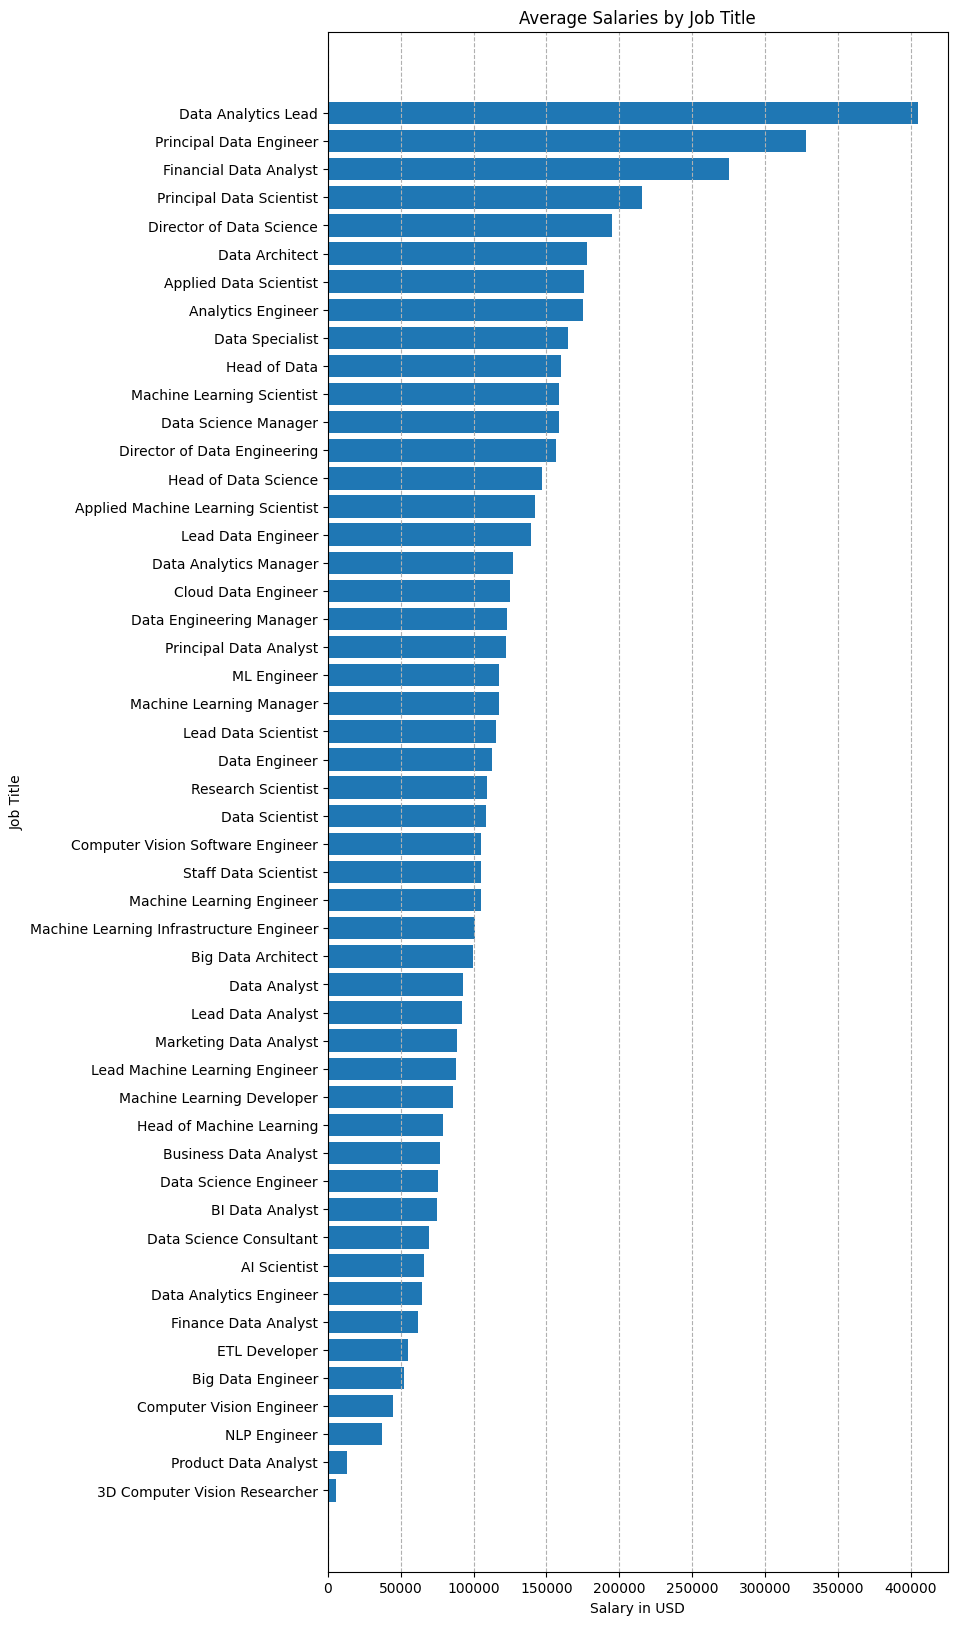

In [31]:
job_title_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending =True)

fig, ax = plt.subplots(figsize = (8,20))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.grid(True, axis='x', linestyle='--')
plt.show()

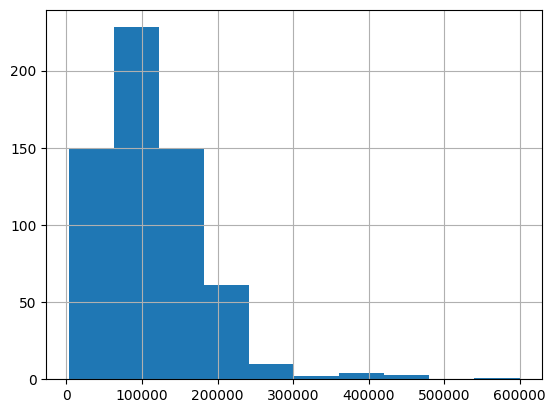

In [32]:
df.salary_in_usd.hist()
plt.show()

In [33]:
print(f'mean salary: {df.salary_in_usd.mean()}')
print(f'median salary: {df.salary_in_usd.median()}')
print(f'mode salary: {df.salary_in_usd.mode()[0]}')

mean salary: 112297.86985172982
median salary: 101570.0
mode salary: 100000


In [34]:
df.salary_in_usd.mode()

0    100000
Name: salary_in_usd, dtype: int64